In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)

In [23]:
movies = pd.read_csv("fandango_score_comparison.csv")

In [24]:
print(movies["Metacritic_norm_round"].value_counts())

3.0    27
4.0    25
2.5    22
1.5    20
3.5    20
4.5    15
2.0    14
1.0     2
0.5     1
Name: Metacritic_norm_round, dtype: int64


(0, 5)

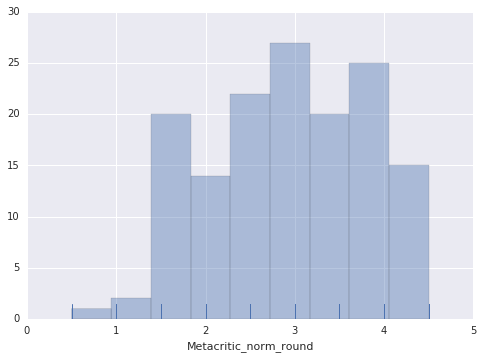

In [25]:
mc_norm_round = sns.distplot(movies["Metacritic_norm_round"],
                             kde = False, rug = True, bins = 9)
axes = mc_norm_round.axes
axes.set_xlim(0,5)

In [26]:
#this shows spread but have to forgive positions

In [27]:
print(movies["Fandango_Stars"].value_counts())

4.5    55
4.0    41
3.5    27
3.0    12
5.0    11
Name: Fandango_Stars, dtype: int64


(0, 5)

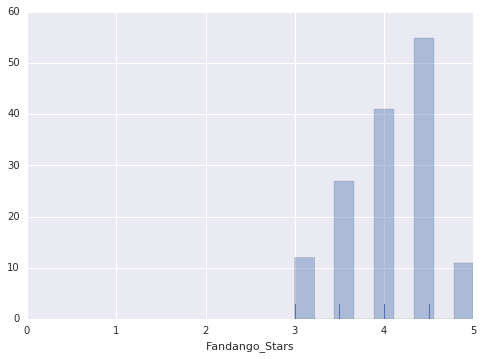

In [28]:
fnd_stars = sns.distplot(movies["Fandango_Stars"],
                             kde = False, rug = True, bins = 9)
axes = fnd_stars.axes
axes.set_xlim(0,5)

Fandango ratings clearly higher on average whereas metacritic has a more even distribution. 

In [29]:
mean_fnd_stars = sum(movies["Fandango_Stars"]) / len(movies["Fandango_Stars"])
mean_mc_norm_round = sum(movies["Metacritic_norm_round"]) / len(movies["Metacritic_norm_round"])
median_fnd_stars = np.median(movies["Fandango_Stars"])
median_mc_norm_round = np.median(movies["Metacritic_norm_round"])
std_fnd_stars = np.std(movies["Fandango_Stars"])
std_mc_norm_round = np.std(movies["Metacritic_norm_round"])

In [30]:
print("Fandango mean:",format(mean_fnd_stars,'.1f'))
print("Metacritic mean:",format(mean_mc_norm_round,'.1f'))
print("Fandango median:",median_fnd_stars)
print("Metacritic median:",median_mc_norm_round)
print("Fandango standard deviation:",format(std_fnd_stars,'.1f'))
print("Metacritic standard deviation:",format(std_mc_norm_round, '.1f'))

Fandango mean: 4.1
Metacritic mean: 3.0
Fandango median: 4.0
Metacritic median: 3.0
Fandango standard deviation: 0.5
Metacritic standard deviation: 1.0


In terms of methodology, Fandango appears to inflate ratings and isn't transparent about how it calculates and aggregates ratings. Metacritic publishes each individual critic rating, and is transparent about how they aggregate them to get a final rating.

In terms of values, The median metacritic score appears higher than the mean metacritic score because a few very low reviews "drag down" the median. The median fandango score is lower than the mean fandango score because a few very high ratings "drag up" the mean.

Fandango ratings appear clustered between 3 and 5, and have a much narrower random than Metacritic reviews, which go from 0 to  5.

Fandango ratings in general appear to be higher than metacritic ratings.

These may be due to movie studio influence on Fandango ratings, and the fact that Fandango calculates its ratings in a hidden way.

As an additional comment, the questions asked rely on an assumption that there is a difference in values when really they are only rounding differences, inapproriate ones at that

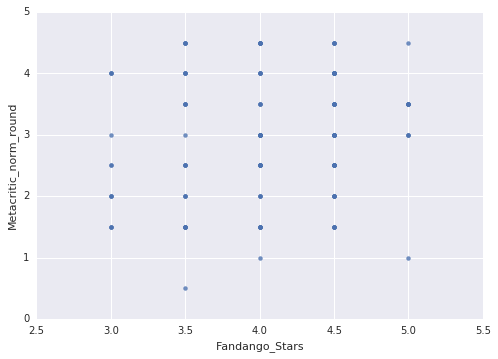

In [31]:
sns.regplot(x=movies["Fandango_Stars"], y=movies["Metacritic_norm_round"], fit_reg=False)


In [32]:
movies["fm_diff"] = movies["Metacritic_norm_round"] - movies["Fandango_Stars"]

In [33]:
movies["fm_diff"] = abs(movies["fm_diff"])

In [34]:
movies.sort_values("fm_diff", ascending=False).head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [35]:
from scipy.stats.stats import pearsonr

In [36]:
r, p_value = pearsonr(movies["Metacritic_norm_round"], movies["Fandango_Stars"])


In [41]:
print("r value is:",format(r, '.2f'))
print("p value is:",format(p_value, '.2f'))

r value is: 0.18
p value is: 0.03


Correlation not high as shown by r value, so scores not inflated, theyre somehow fundamentally different in their ratings

In [42]:
from scipy.stats import linregress

In [45]:
slope, intercept, r_value, p_value, std_err = linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

In [46]:
pred_3 = 3 * slope + intercept

In [48]:
format(pred_3, '.1f')

'4.1'

In [49]:
pred_1 = slope + intercept
format(pred_1, '.1f')

'3.9'

In [51]:
pred_5 = 5 * slope + intercept
format(pred_5, '.1f')

'4.3'

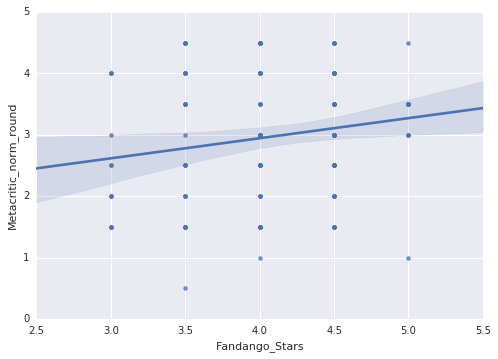

In [52]:
sns.regplot(x=movies["Fandango_Stars"], y=movies["Metacritic_norm_round"], fit_reg=True)

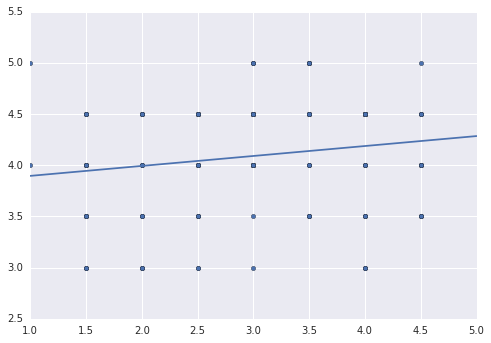

In [53]:
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.plot([1,5],[pred_1,pred_5])
plt.xlim(1,5)
plt.show()